In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [3]:
%matplotlib inline

In [4]:
df=pd.read_csv("kc_house_data.csv")

In [5]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [7]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [8]:
df.drop('date', axis=1, inplace=True)

In [9]:
df.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [10]:
df['yr_renovated'].value_counts()

0       20699
2014       91
2013       37
2003       36
2000       35
        ...  
1934        1
1959        1
1951        1
1948        1
1944        1
Name: yr_renovated, Length: 70, dtype: int64

In [11]:
df['yr_renovated_data'] =np.where(df['yr_renovated']!= 0, True, False) 

In [12]:
df.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,yr_renovated_data
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,False
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,True
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,False
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,False
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,False


# Pearsons Correlation Coefficient


In [13]:
df.corr()['price']

id                  -0.016762
price                1.000000
bedrooms             0.308350
bathrooms            0.525138
sqft_living          0.702035
sqft_lot             0.089661
floors               0.256794
waterfront           0.266369
view                 0.397293
condition            0.036362
grade                0.667434
sqft_above           0.605567
sqft_basement        0.323816
yr_built             0.054012
yr_renovated         0.126434
zipcode             -0.053203
lat                  0.307003
long                 0.021626
sqft_living15        0.585379
sqft_lot15           0.082447
yr_renovated_data    0.126092
Name: price, dtype: float64

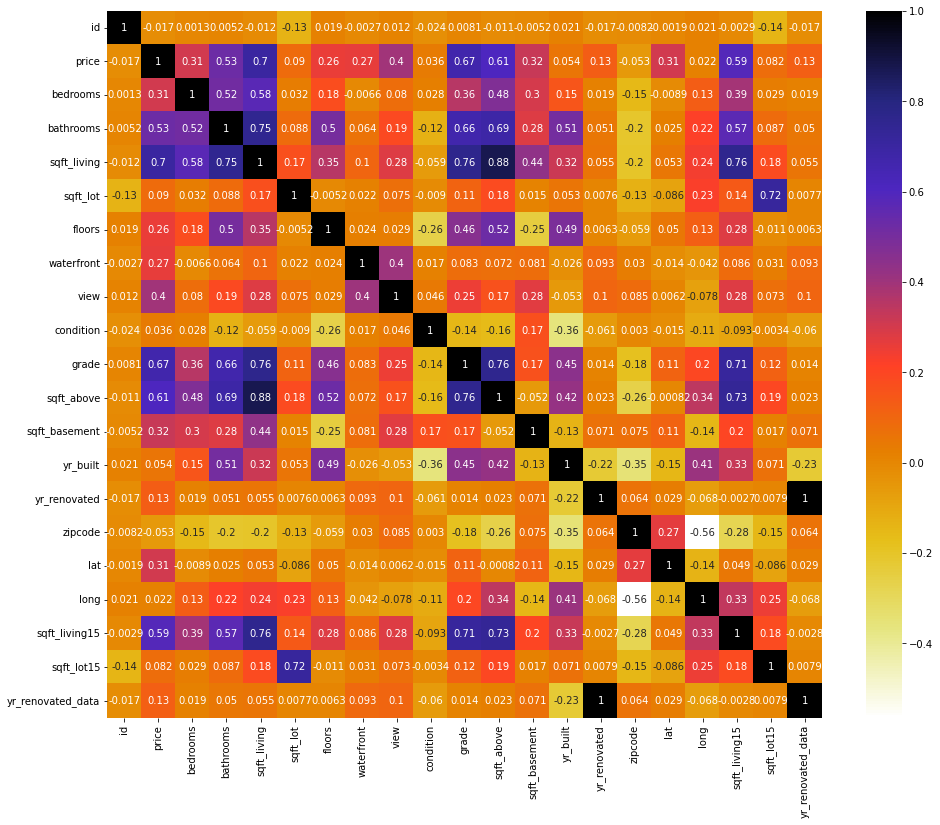

In [14]:
import seaborn as sns
plt.figure(figsize=(16,13))
sns.heatmap(df.corr(),annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

In [15]:
# with the following function we can select highly correlated features
# it will remove the first feature that is correlated with anything other feature

def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [16]:
X = df.drop("price",axis=1)


In [17]:
y=df["price"]

In [18]:
# separate dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.3,
    random_state=0)

X_train.shape, X_test.shape

((15129, 20), (6484, 20))

In [19]:
corr_features = correlation(X_train, 0.75)
len(set(corr_features))

5

In [20]:
corr_features

{'grade', 'sqft_above', 'sqft_living', 'sqft_living15', 'yr_renovated_data'}

In [21]:
X.head()

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,yr_renovated_data
0,7129300520,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,False
1,6414100192,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,True
2,5631500400,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,False
3,2487200875,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,False
4,1954400510,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,False


In [22]:
from sklearn.model_selection import train_test_split
X_train1,X_test1,y_train1,y_test1=train_test_split(df[['waterfront',	'view',	'condition'	]],
                                              df['grade'],test_size=0.3,random_state=100)

In [23]:
X_train1.head()

,waterfront,view,condition
20477,0,0,3
4102,0,0,2
3415,0,0,2
12167,0,0,5
8823,0,0,4


In [24]:
X_train['condition'].unique()

array([3, 4, 5, 2, 1])

In [25]:
## Perform chi2 test
### chi2 returns 2 values
### Fscore and the pvalue
from sklearn.feature_selection import chi2
f_p_values=chi2(X_train1,y_train1)

In [26]:
f_p_values

(array([ 282.45527048, 3221.56132245,   50.17175608]),
 array([4.31876477e-54, 0.00000000e+00, 5.82968084e-07]))

In [27]:
import pandas as pd
p_values=pd.Series(f_p_values[1])
p_values.index=X_train1.columns
p_values

waterfront    4.318765e-54
view          0.000000e+00
condition     5.829681e-07
dtype: float64

In [28]:
#perform anova test is the predictors are categorical and response is numerical
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

In [29]:
X_train2,X_test2,y_train2,y_test2=train_test_split(df[['waterfront',	'view',	'condition','grade'	]],
                                              df['price'],test_size=0.3,random_state=100)

In [30]:
fvalue_Best = SelectKBest(f_classif, k=2)
X_kbest = fvalue_Best.fit_transform(X_train2, y_train2)
print(X_kbest)
print('Original number of features:', X_train2.shape)
print('Reduced number of features:',X_kbest.shape)

[[0 8]
 [0 7]
 [0 7]
 ...
 [0 8]
 [0 7]
 [0 8]]
Original number of features: (15129, 4)
Reduced number of features: (15129, 2)


In [31]:
cols = fvalue_Best.get_support(indices=True)
X_train2.head()

,waterfront,view,condition,grade
20477,0,0,3,8
4102,0,0,2,7
3415,0,0,2,7
12167,0,0,5,6
8823,0,0,4,8


In [32]:
cols

array([0, 3])

In [33]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel

In [ ]:
sel = SelectFromModel(RandomForestClassifier(n_estimators = 100))
sel.fit(X_train, y_train)